                                                                             age
Valid N:                                                                   32561
                                                                                
Minimum:                                                                      17
Quartile 1:                                                                 28.0
Mode:                                                                         36
Median:                                                                     37.0
Mean:                                                                    38.5816
Quartile 3:                                                                 48.0
Max:                                                                          90
                                                                                
Standard Deviation:                                                      13.6404
Inter-Quartile Range:       

C:\Users\Fujitora\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


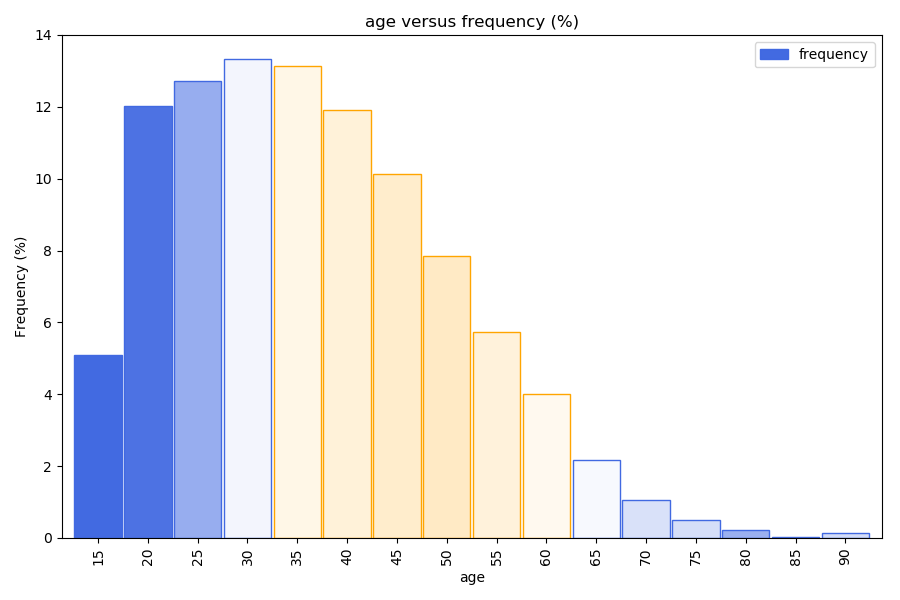

                                                                          fnlwgt
Valid N:                                                                   32561
                                                                                
Minimum:                                                                   12285
Quartile 1:                                                             117827.0
Mode:                                                                     123011
Median:                                                                 178356.0
Mean:                                                                189778.3665
Quartile 3:                                                             237051.0
Max:                                                                     1484705
                                                                                
Standard Deviation:                                                  105549.9777
Inter-Quartile Range:       

C:\Users\Fujitora\Anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: invalid value encountered in double_scalars


<IPython.core.display.Javascript object>


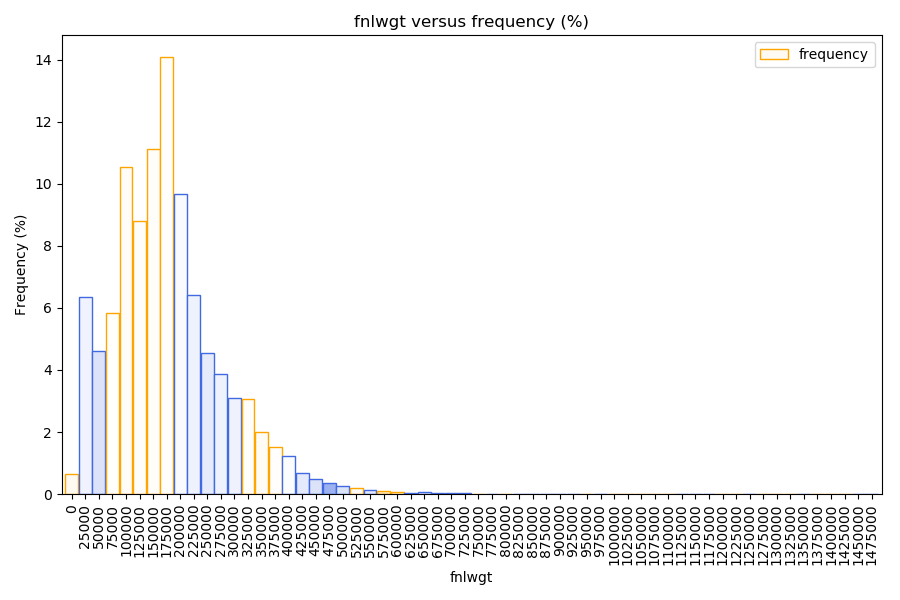

                                                                   education-num
Valid N:                                                                   32561
                                                                                
Minimum:                                                                       1
Quartile 1:                                                                  9.0
Mode:                                                                          9
Median:                                                                     10.0
Mean:                                                                    10.0807
Quartile 3:                                                                 12.0
Max:                                                                          16
                                                                                
Standard Deviation:                                                       2.5727
Inter-Quartile Range:       

<IPython.core.display.Javascript object>


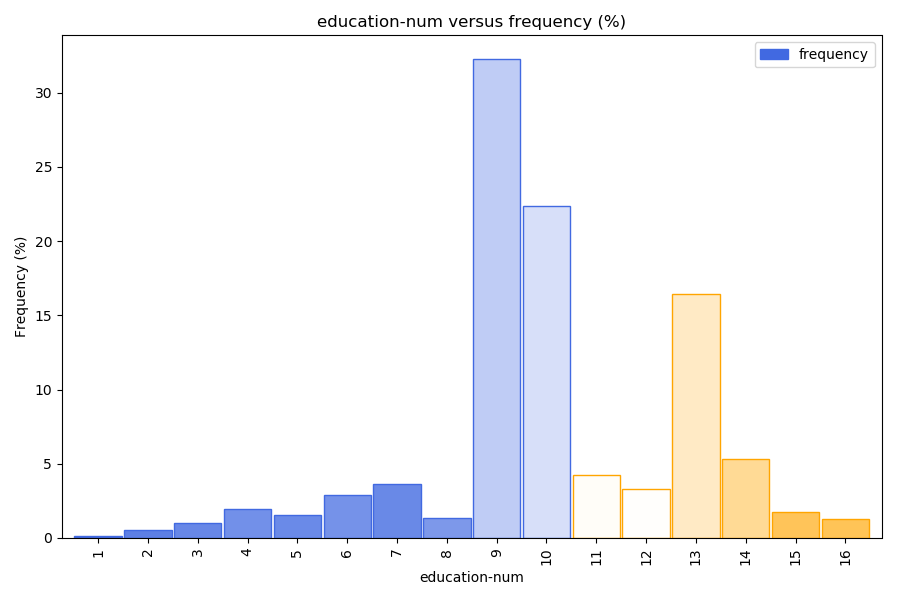

                                                                    capital-gain
Valid N:                                                                    2712
                                                                                
Minimum:                                                                   114.0
Quartile 1:                                                               3411.0
Mode:                                                                    15024.0
Median:                                                                   7298.0
Mean:                                                                 12938.5413
Quartile 3:                                                              14084.0
Max:                                                                     99999.0
                                                                                
Standard Deviation:                                                   22395.4135
Inter-Quartile Range:       

<IPython.core.display.Javascript object>


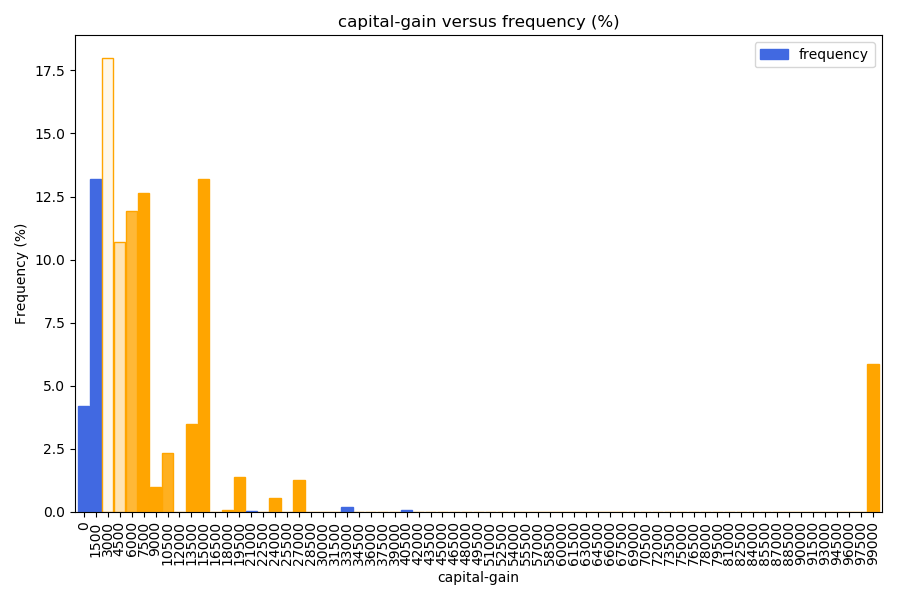

                                                                    capital-loss
Valid N:                                                                    1519
                                                                                
Minimum:                                                                   155.0
Quartile 1:                                                               1672.0
Mode:                                                                     1902.0
Median:                                                                   1887.0
Mean:                                                                  1871.4286
Quartile 3:                                                               1977.0
Max:                                                                      4356.0
                                                                                
Standard Deviation:                                                     376.5715
Inter-Quartile Range:       

<IPython.core.display.Javascript object>


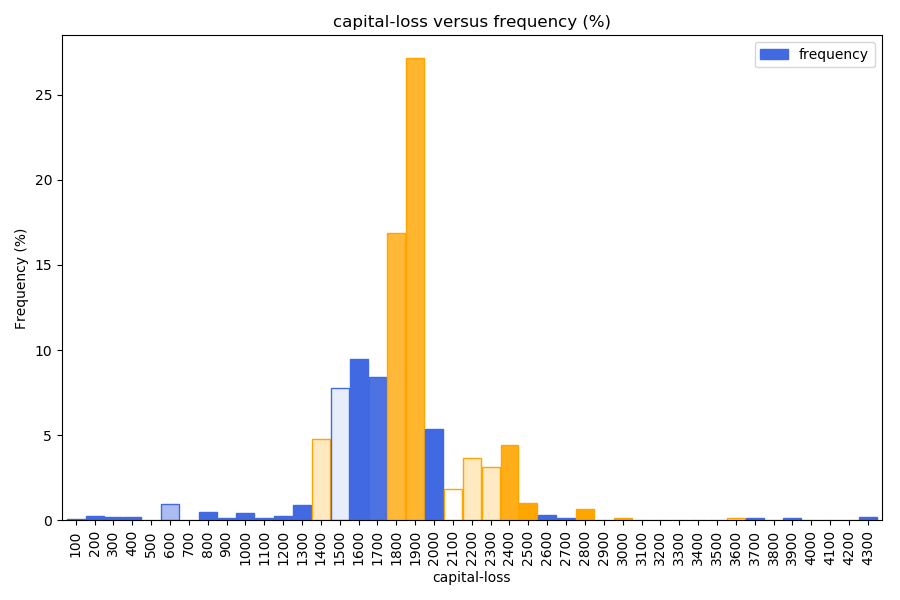

                                                                  hours-per-week
Valid N:                                                                   32561
                                                                                
Minimum:                                                                       1
Quartile 1:                                                                 40.0
Mode:                                                                         40
Median:                                                                     40.0
Mean:                                                                    40.4375
Quartile 3:                                                                 45.0
Max:                                                                          99
                                                                                
Standard Deviation:                                                      12.3474
Inter-Quartile Range:       

<IPython.core.display.Javascript object>


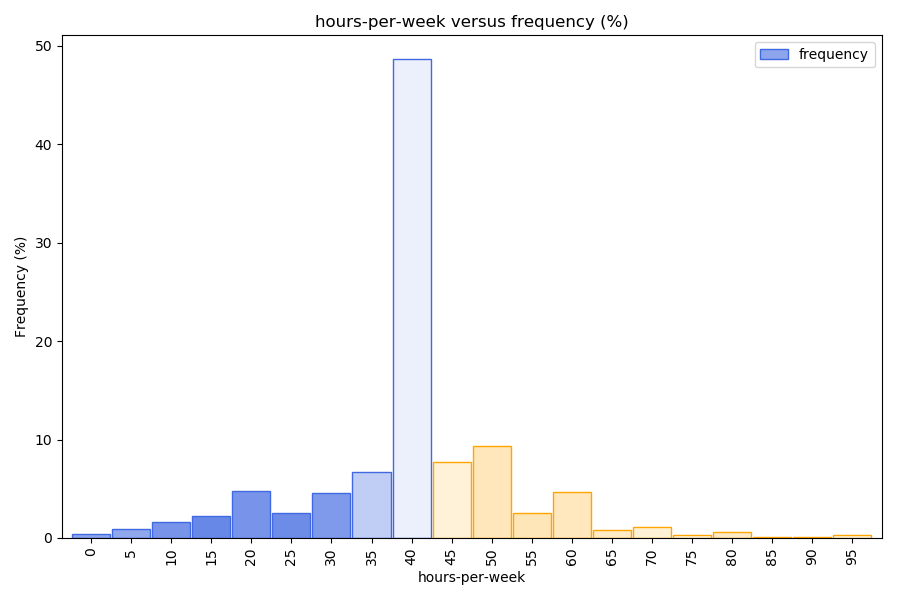

<IPython.core.display.Javascript object>


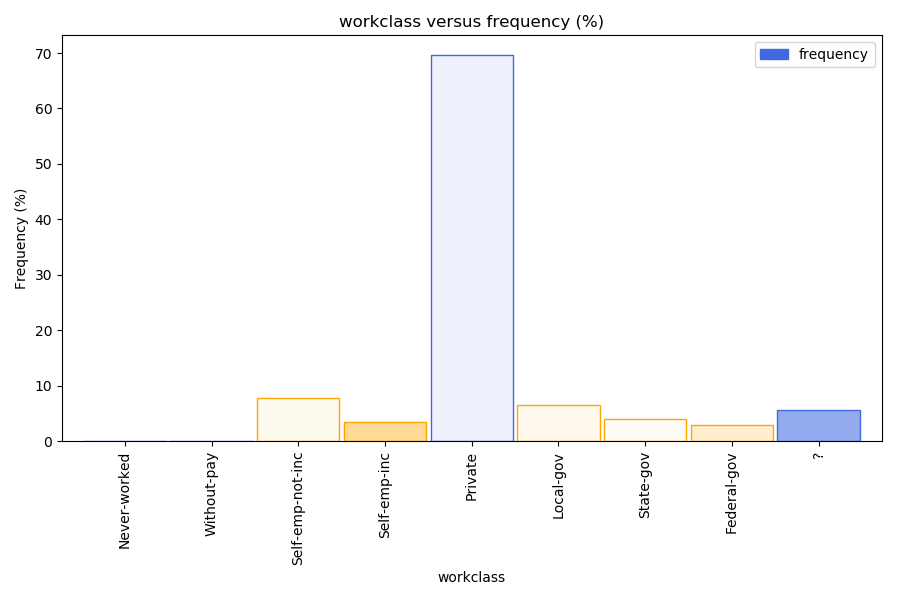

<IPython.core.display.Javascript object>


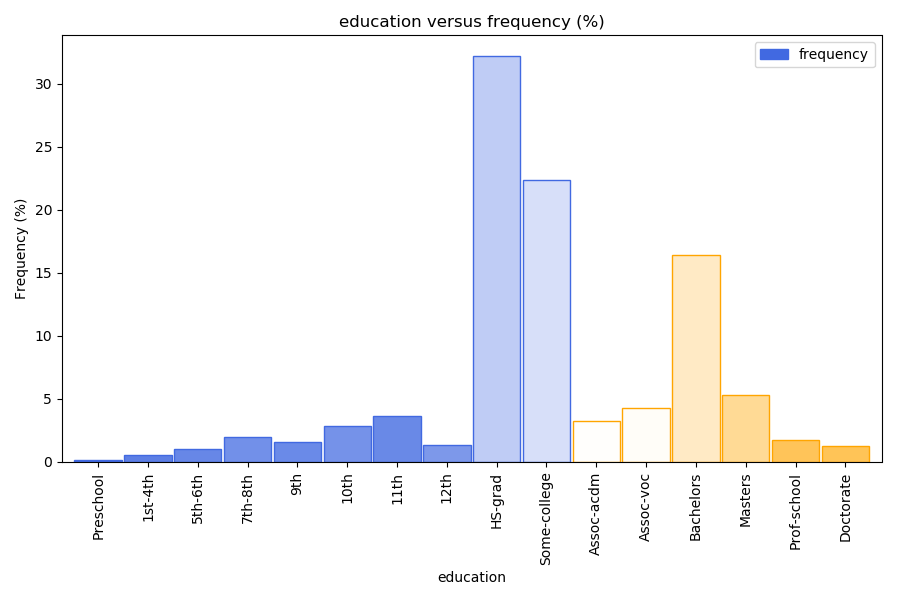

<IPython.core.display.Javascript object>


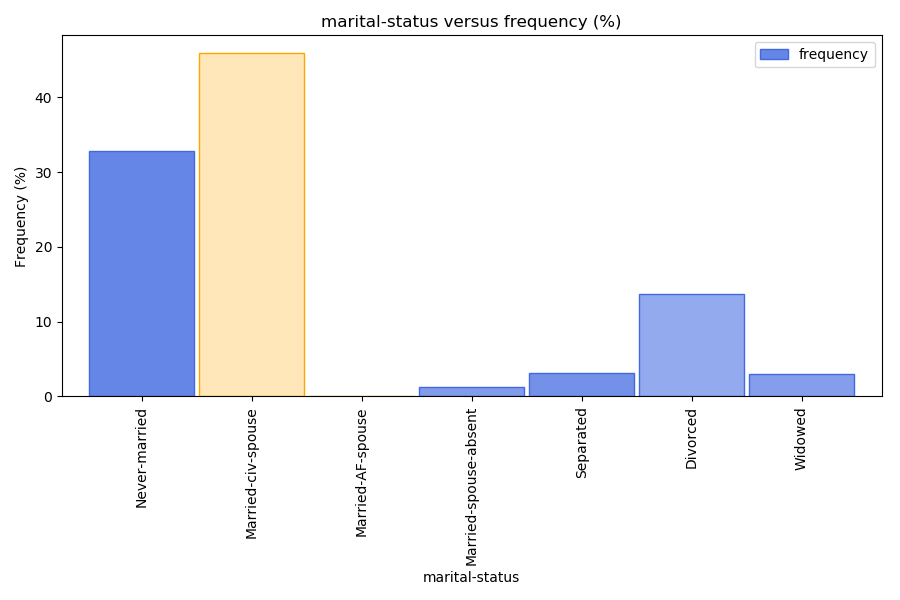

<IPython.core.display.Javascript object>


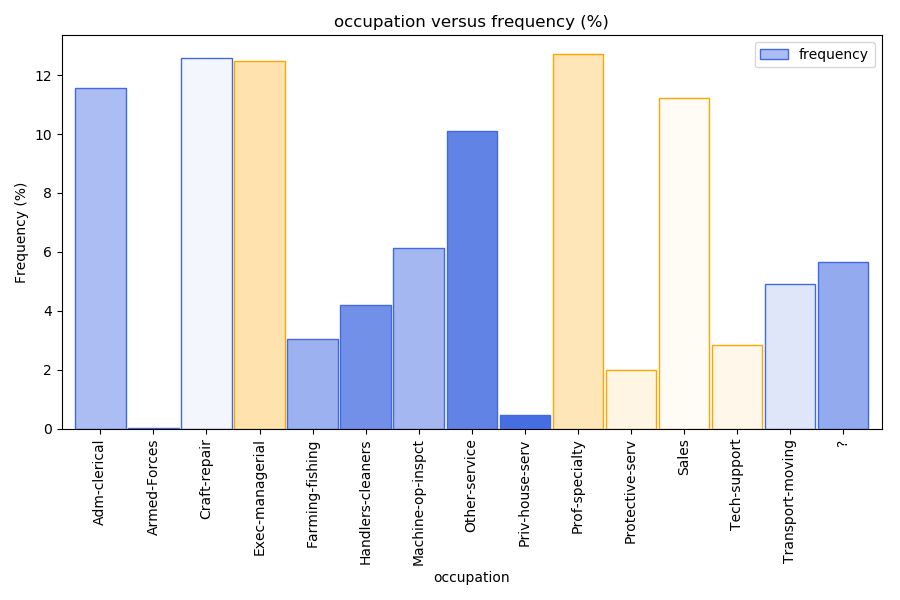

<IPython.core.display.Javascript object>


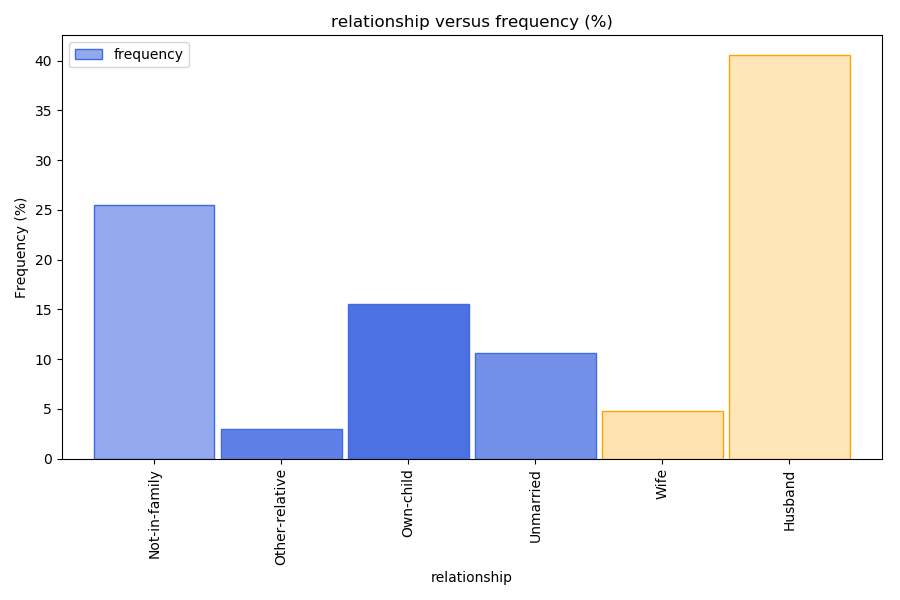

<IPython.core.display.Javascript object>


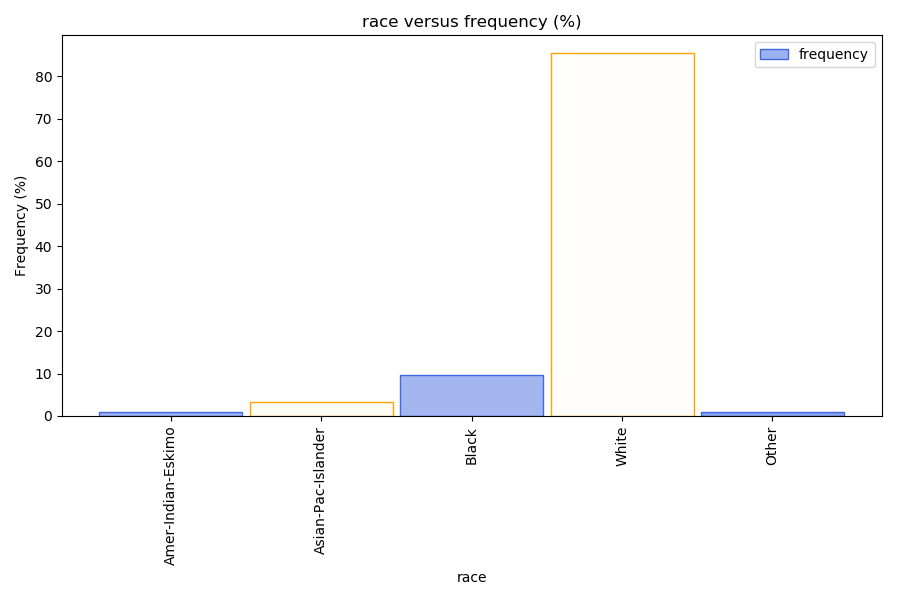

<IPython.core.display.Javascript object>


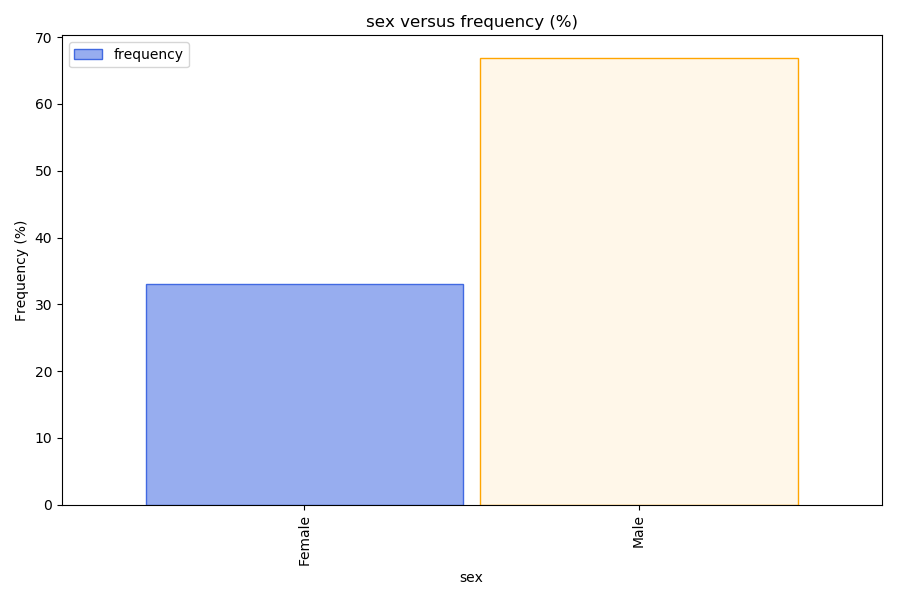

<IPython.core.display.Javascript object>


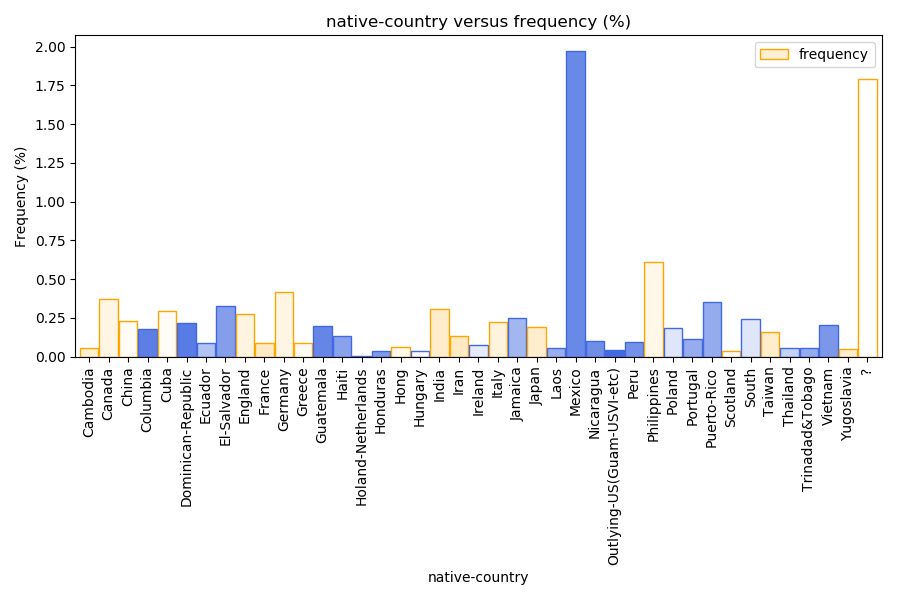

<IPython.core.display.Javascript object>


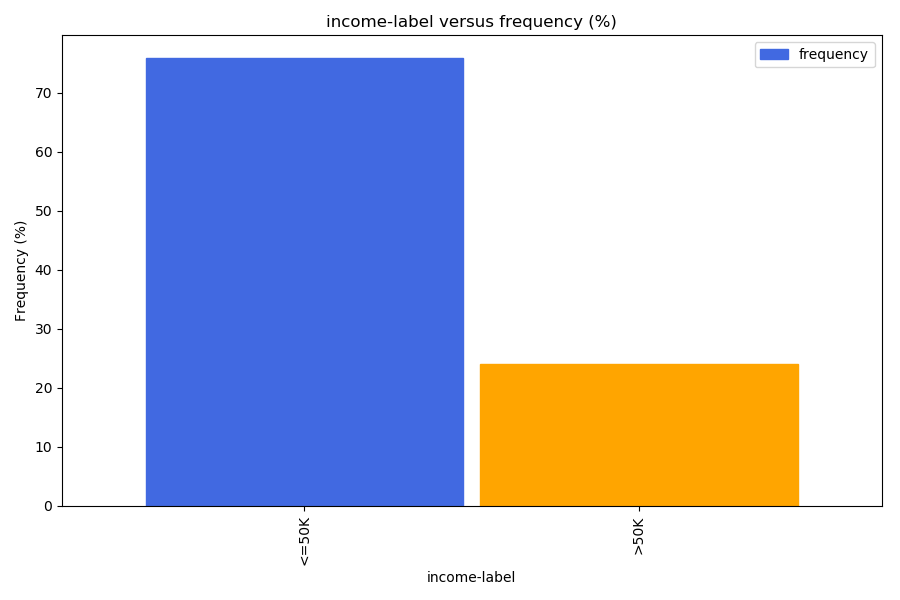

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.078141       0.066345      0.185141      0.219137   
fnlwgt         -0.078141  1.000000      -0.035706      0.005299     -0.045770   
education-num   0.066345 -0.035706       1.000000      0.445117      0.185219   
capital-gain    0.185141  0.005299       0.445117      1.000000           NaN   
capital-loss    0.219137 -0.045770       0.185219           NaN      1.000000   
hours-per-week  0.142907 -0.021621       0.167215      0.287465      0.151686   

                hours-per-week  
age                   0.142907  
fnlwgt               -0.021621  
education-num         0.167215  
capital-gain          0.287465  
capital-loss          0.151686  
hours-per-week        1.000000  


<IPython.core.display.Javascript object>


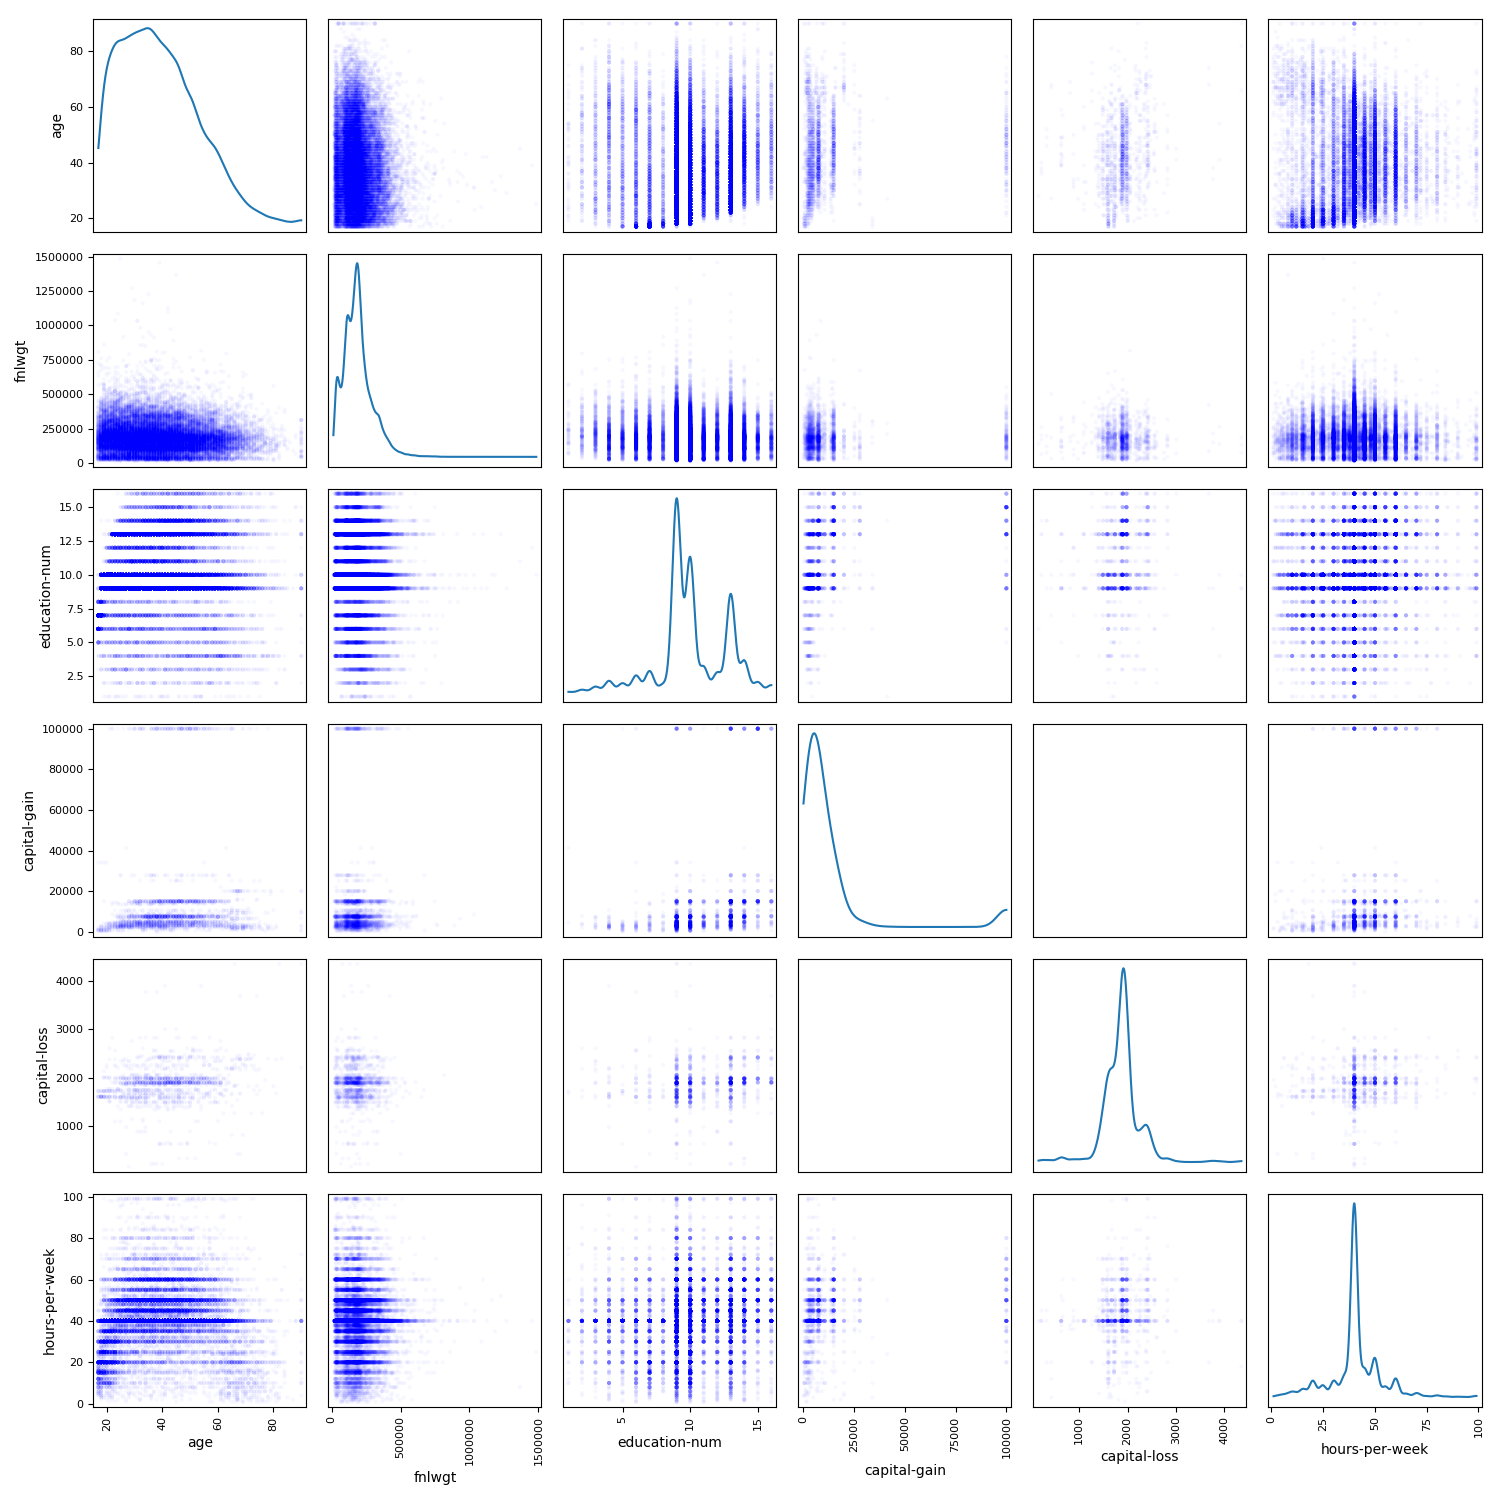

In [55]:
import sqlite3
import pandas
from pandas.plotting import scatter_matrix
import numpy
import math
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as python_plot
import matplotlib.colors
import pandas.plotting
from math import isnan
from matplotlib import colors as color_list

# some set-up of column headers

census_headers = ['age', 'workclass', 'fnlwgt', 'education',
        'education-num', 'marital-status', 'occupation', 'relationship',
        'race', 'sex', 'capital-gain', 'capital-loss',
        'hours-per-week', 'native-country', 'income-label']

numeric_headers = [census_headers[0], census_headers[2], census_headers[4],
        census_headers[10], census_headers[11],census_headers[12]]

non_numeric_headers = [census_headers[1], census_headers[3], census_headers[5], census_headers[6],
        census_headers[7], census_headers[8], census_headers[9], census_headers[13], census_headers[14]]

non_numeric_values = {
    'workclass':['Never-worked', 'Without-pay', 'Self-emp-not-inc',
            'Self-emp-inc', 'Private', 'Local-gov', 'State-gov', 'Federal-gov', '?'],
    'education':['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
            'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'],
    'marital-status':['Never-married', 'Married-civ-spouse', 'Married-AF-spouse',
            'Married-spouse-absent', 'Separated', 'Divorced', 'Widowed'],
    'occupation':['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing',
            'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty',
            'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', '?'],
    'relationship':['Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife', 'Husband'],
    'race':['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other'],
    'sex':['Female', 'Male'],
    # Note, "Hong" and "South" seem to be data mining errors (All fields with 2+ words have hyphens or ampersands)
    'native-country':['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador',
            'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong',
            'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua',
            'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland',
            'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia', '?'],
    'income-label':['<=50K', '>50K']
}

numeric_bin_sizes = {
    'age':5,
    'fnlwgt':25000,
    'education-num':1,
    'capital-gain':1500,
    'capital-loss':100,
    'hours-per-week':5,
}

def print_left_right(left="", right=""):
    print(str(left).ljust(40) + str(right).rjust(40))
    
# float vs int range issues
# for size-2 results, this returns size 3 array
def histogram_bin_sequence(minimum, maximum, step):
    minimum_over_step = int(math.floor(minimum / float(step)))
    after_minimum = (minimum_over_step + 1) * step
    result = list(range(after_minimum, maximum, step))
    result.insert(0, minimum)
    return result

census_data_frame = pandas.read_csv('adult.data', names=census_headers)
census_data_frame['capital-gain'].replace(0, numpy.nan, inplace=True)
census_data_frame['capital-loss'].replace(0, numpy.nan, inplace=True)

def linear_interpolation(a, b, t):
    return a*(1 - t) + b*t

colors = dict(color_list.BASE_COLORS, **color_list.CSS4_COLORS)
blue = numpy.array(color_list.to_rgba(colors["royalblue"]))
white = numpy.array(color_list.to_rgba(colors["white"]))
orange = numpy.array(color_list.to_rgba(colors["orange"]))

target_column = census_data_frame['income-label']
target_frequency = target_column.value_counts()[' <=50K']
count = census_data_frame.count()[0]
target_frequency = float(target_frequency)/count

#ratio is in range [0 -> target_frequency -> 1]
def fetch_color(ratio, solid=False):
    if solid:
        return blue if ratio >= target_frequency else orange
    if (ratio >= target_frequency):
        numerator = ratio - target_frequency
        denominator = 1 - target_frequency
        return linear_interpolation(blue, white, 1 - numerator/denominator)
    else:
        numerator = target_frequency - ratio
        denominator = target_frequency
        return linear_interpolation(orange, white, 1 - numerator/denominator)

def graph_bar_chart(header, data_frame, color_format="stacked"):
    figure, axes = python_plot.subplots(figsize=(9,6))
    if color_format == "gradient":
        graph = data_frame.plot.bar(x=header,y='frequency', ax=axes, stacked=True, width=0.95,
                color=data_frame['gradient-color'], edgecolor=data_frame['clamp-color'])
    elif color_format == "clamp":
        graph = data_frame.plot.bar(x=header,y='frequency', ax=axes, stacked=True, width=0.95,
                color=data_frame['clamp-color'], edgecolor=data_frame['clamp-color'])
    else: #default: color_format == "stacked":
        # https://pstblog.com/2016/10/04/stacked-charts
        stack_base = numpy.zeros(len(data_frame))
        for stack in [1,2]:
            color = "royalblue" if stack == 1 else "orange"
            graph = data_frame.plot.bar(x=header,y=('frequency'+str(stack)), ax=axes, stacked=True, width=0.95,
                                        bottom = stack_base, color=color, edgecolor=data_frame['clamp-color'])
            values = list(data_frame.loc[:, 'frequency'+str(stack)])
            stack_base += values
            
    graph.set_title(header + ' versus frequency (%)')
    graph.set_ylabel('Frequency (%)')
    graph.set_xticklabels(data_frame[header])
    python_plot.tight_layout()
    python_plot.show()

#census_data_frame['target'] = numpy.where(census_data_frame['income-label']==' <=50K', 1, 0)

#census_data_frame['target'] = census_data_frame['income-label']=='<=50K' ? 1 : 0
numeric_census_data_frame = census_data_frame.drop(non_numeric_headers, axis=1)
non_numeric_census_data_frame = census_data_frame.drop(numeric_headers, axis=1)

color_format = "gradient"

# go through numeric data (e.g. integers like age or hours-per-week)
for header, values in numeric_census_data_frame.iteritems():
    value_data_frame = pandas.DataFrame(values)
    
    # print a summary of different statistical moments and properties
    print_left_right(right=header)
    print_left_right(left="Valid N:", right=value_data_frame.count()[0])
    print_left_right()
    print_left_right(left="Minimum:", right=value_data_frame.min()[0])
    print_left_right(left="Quartile 1:", right=("%.1f" % value_data_frame.quantile(.25)[0]))
    print_left_right(left="Mode:", right=value_data_frame.mode().iloc[0][0])
    print_left_right(left="Median:", right=("%.1f" % value_data_frame.median()[0]))
    print_left_right(left="Mean:", right=("%.4f" % value_data_frame.mean()[0]).rjust(40))
    print_left_right(left="Quartile 3:", right=("%.1f" % value_data_frame.quantile(.75)[0]))
    print_left_right(left="Max:", right=value_data_frame.max()[0])
    print_left_right()
    print_left_right(left="Standard Deviation:", right=("%.4f" % value_data_frame.std()[0]))
    print_left_right(left="Inter-Quartile Range:", right=("%.1f" % (value_data_frame.quantile(.75)[0]-value_data_frame.quantile(.25)[0])))
    print_left_right(left="Variance:", right=("%.4f" % value_data_frame.var()[0]))
    print_left_right()
    print_left_right(left="Skew:", right=("%.4f" % value_data_frame.skew()[0]))
    print_left_right()
    print_left_right(left="Kurtosis:", right=("%.4f" % value_data_frame.kurt()[0]))
    
    minimum_bin = int(value_data_frame.min()[0])
    maximum_bin = int(value_data_frame.max()[0])
    bins = maximum_bin - minimum_bin + 1
    
    step = int(numeric_bin_sizes[header])
    minimum_bin = int(math.floor(minimum_bin / step) * step) # integer division (breaks values into size "step" bins)
    maximum_bin = int(math.floor(maximum_bin / step) * step)
    
    statistics = {}
    
    # initialize array
    for bin_value in range(minimum_bin, maximum_bin+1, step):
        statistics[int(bin_value)] = [0,0,0]
        
    valid_n = 0
    for index in range(len(values)):
        index = int(index)
        value = values[index]
        if not isnan(value): # capital-gain and capital-loss seem to use zero as a null value
            bin_value = int(math.floor(value / step) * step)
            statistics[bin_value][0] += 1
            if target_column[index] == ' <=50K':
                statistics[bin_value][1] += 1
            else:
                statistics[bin_value][2] += 1
            valid_n += 1
            
    header_axis = []
    frequency_axis = []
    frequency1_axis = []
    frequency2_axis = []
    for key in sorted(statistics):
        header_axis.append(key)
        frequency_axis.append(statistics[key][0] * 100.0 / valid_n)
        frequency1_axis.append(statistics[key][1] * 100.0 / valid_n)
        frequency2_axis.append(statistics[key][2] * 100.0 / valid_n)
    
    # get values and their frequencies
    data_frame = pandas.DataFrame(data={
            header:header_axis,
            "frequency":frequency_axis,
            "frequency1":frequency1_axis,
            "frequency2":frequency2_axis})
    
    color_gradients = []
    solid_colors = []
    for index in range(len(data_frame)):
        ratio = float(data_frame['frequency1'][index])/data_frame['frequency'][index]
        color_gradients.append(fetch_color(ratio, False))
        solid_colors.append(fetch_color(ratio, True))
        
    data_frame['gradient-color'] = color_gradients
    data_frame['clamp-color'] = solid_colors
    
    #if header == "hours-per-week":
    #    data_frame = data_frame[data_frame["hours-per-week"] != 40]
    
    graph_bar_chart(header, data_frame, color_format)
    
# go through string data (e.g. enumerations like sex or native-country)
for header, values in non_numeric_census_data_frame.iteritems():
    statistics = {}
    
    # initialize array
    for key in non_numeric_values[header]:
        statistics[key] = [0,0,0]
        
    valid_n = 0
    for index in range(len(values)):
        index = int(index)
        value = values[index]
        statistics[value.strip()][0] += 1
        if target_column[index] == ' <=50K':
            statistics[value.strip()][1] += 1
        else:
            statistics[value.strip()][2] += 1
        valid_n += 1
            
    header_axis = []
    frequency_axis = []
    frequency1_axis = []
    frequency2_axis = []
    for key in non_numeric_values[header]:
        header_axis.append(key)
        frequency_axis.append(statistics[key][0] * 100.0 / valid_n)
        frequency1_axis.append(statistics[key][1] * 100.0 / valid_n)
        frequency2_axis.append(statistics[key][2] * 100.0 / valid_n)
    
    # get values and their frequencies
    data_frame = pandas.DataFrame(data={
            header:header_axis,
            "frequency":frequency_axis,
            "frequency1":frequency1_axis,
            "frequency2":frequency2_axis})
    
    color_gradients = []
    solid_colors = []
    for index in range(len(data_frame)):
        ratio = float(data_frame['frequency1'][index])/data_frame['frequency'][index]
        color_gradients.append(fetch_color(ratio, False))
        solid_colors.append(fetch_color(ratio, True))
        
    data_frame['gradient-color'] = color_gradients
    data_frame['clamp-color'] = solid_colors
    
    if header == "native-country":
        data_frame = data_frame[data_frame['native-country'] != "United-States"]
        
    graph_bar_chart(header, data_frame, color_format)

# print correlation matrix
print(numeric_census_data_frame.corr(method='spearman'))

# print the scatterplot matrix
pandas.plotting.scatter_matrix(numeric_census_data_frame, alpha=0.03, figsize=(15, 15), diagonal='kde', color='blue')#, ax=axes)
python_plot.tight_layout()
python_plot.show()
